# Avaliando um algoritmo 

### Bibliotecas e Carregamento

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as CLF

import matplotlib.pyplot as plt

#### Download e carregamento

In [2]:
df = pd.read_csv('../datasets/diabetes.csv')

#### Head

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


#### Shape

In [19]:
df.shape

(520, 17)

## Pré-processamento

In [4]:
for c in df.columns[1:]:
    df[c] = pd.get_dummies(df[c], drop_first=True)

### Separando dados e classe
 - `X_full`
 - `y_full`

In [5]:
X_full = df[df.columns[0:-1]]
y_full = df[df.columns[-1]]

## Split dos dados
 - `Train`: Simula os dados existentes para treinamento
 - `Test`: Porção dos dados de treinamento para simular dados nunca vistos
 
![66%](https://progress-bar.dev/66?title=Treino)
![33%](https://progress-bar.dev/33?title=Teste)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33, random_state=1)

## Treinando um modelo

In [16]:
clf = CLF()
clf.fit(X_train, y_train)

KNeighborsClassifier()

### Qualidade do modelo no treinamento
Teste utilizando os mesmos dados do treinamento

In [17]:
# Os mesmos dados do treinamento
y_hat_train = clf.predict(X_train)

print('Erro de treinamento')
print(classification_report(y_train, y_hat_train))

Erro de treinamento
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       134
           1       0.98      0.88      0.93       214

    accuracy                           0.92       348
   macro avg       0.91      0.93      0.91       348
weighted avg       0.93      0.92      0.92       348



### Qualidade do modelo no teste
Teste utilizando dados nunca vistos pelo modelo

In [18]:
# Dados não existentes no treinamento
y_hat_test = clf.predict(X_test)

print('Erro de validação')
print(classification_report(y_test, y_hat_test))

Erro de validação
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        66
           1       0.91      0.81      0.86       106

    accuracy                           0.83       172
   macro avg       0.82      0.84      0.83       172
weighted avg       0.84      0.83      0.83       172



In [25]:
diff_train = np.cumsum((y_train != y_hat_train)*1)
diff_test = np.cumsum((y_test != y_hat_test)*1)

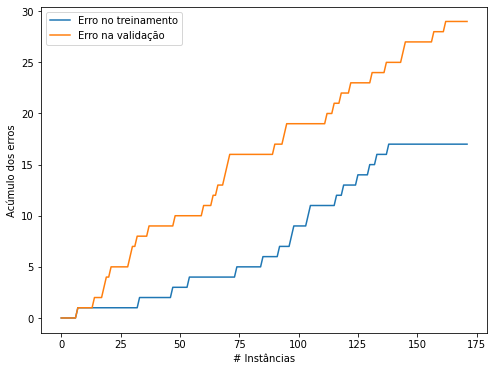

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(diff_test)), diff_train[:len(diff_test)], label='Erro no treinamento')
plt.plot(np.arange(len(diff_test)), diff_test, label='Erro na validação')

plt.xlabel('# Instâncias')
plt.ylabel('Acúmulo dos erros')

plt.legend()

## Tunning $k$

In [20]:
MAX_K = 200

In [12]:
train_scores = []
test_scores = []

for k in range(1, MAX_K + 1):
    # Treinando
    clf = CLF(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Testando
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Salvando scores
    train_scores.append(accuracy_score(y_train, y_hat_train))
    test_scores.append(accuracy_score(y_test, y_hat_test ))

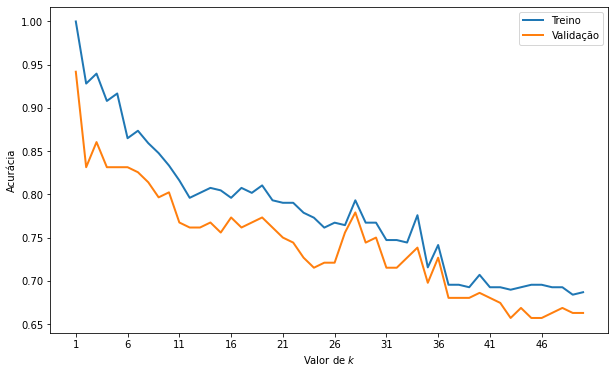

In [29]:
#
cut = 50

# Plot
plt.figure(figsize=(10, 6))
xticks = range(1, cut + 1)

plt.plot(xticks, train_scores[:cut], label='Treino', linewidth=2)
plt.plot(xticks, test_scores[:cut], label='Validação', linewidth=2)

plt.xticks(range(1, cut + 1, 5))

plt.xlabel('Valor de $k$')
plt.ylabel('Acurácia')

plt.legend()